In [5]:
import numpy as np
from PIL import Image



In [9]:
im = Image.open('image_to_be_blurred.jpg')
im_arr=np.array(im)

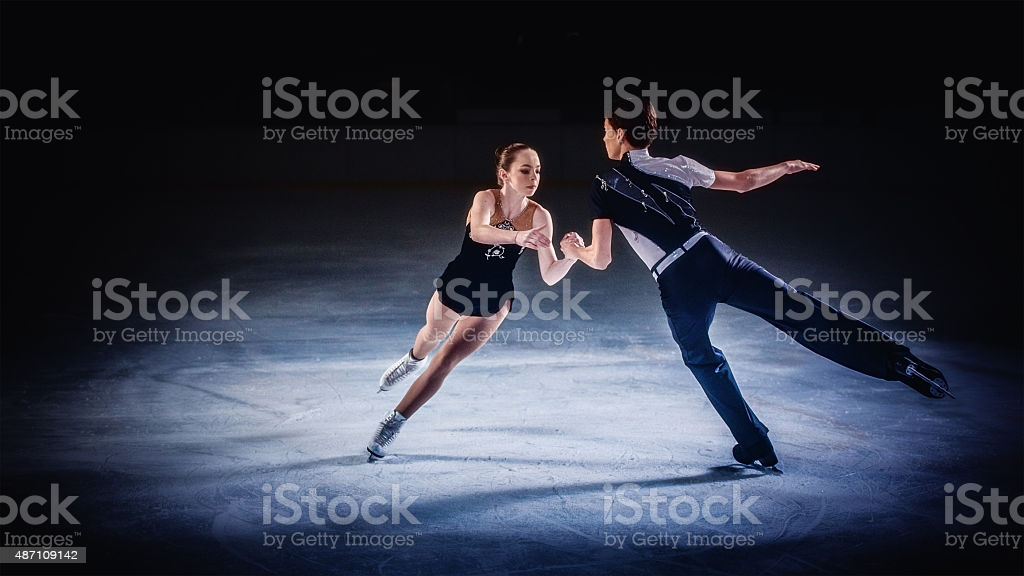

In [8]:
im

In [11]:
im_arr.shape

(576, 1024, 3)

In [21]:
im_=im_arr[200:300,600:700,:]

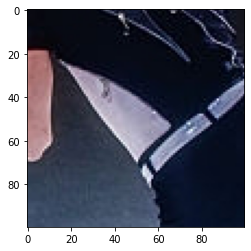

In [22]:
import matplotlib.pyplot as plt
plt.imshow(im_)

In [77]:
def boxBlurKernel(image,image_pos_x,image_pos_y,radius):
    left_x_bound=image_pos_x-radius
    right_x_bound=image_pos_x+radius+1
    up_y_bound=image_pos_y-radius
    down_y_bound=image_pos_y+radius+1
    if left_x_bound<0:
        left_x_bound=0
    if right_x_bound>image.shape[0]:
        right_x_bound=-1
    if down_y_bound>image.shape[1]:
        image_pos_y=-1
    if up_y_bound<0:
        up_y_bound=0
    filtered=np.mean(np.mean(image[left_x_bound:right_x_bound,up_y_bound:down_y_bound,:],axis=0),axis=0)
    return filtered

In [68]:
def apply_blur_without_par(image):
    im_lst=[]
    for y in range(image.shape[1]):
        one_row=[]
        for x in range(image.shape[0]):
            one_row.append(boxBlurKernel(image,x,y,1))
        im_lst.append(one_row)
    return np.array(im_lst)

In [69]:
im_blur=apply_blur_without_par(im_)

In [70]:
print(im_blur.shape)

(100, 100, 3)


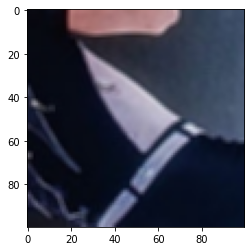

In [76]:
plt.imshow(im_blur.astype('uint8'))

In [78]:
print(im_blur.astype('uint8'))

[[[  8  10  17]
  [  9  10  17]
  [  9  10  18]
  ...
  [ 62  79 105]
  [ 62  79 105]
  [ 63  79 105]]

 [[  8   9  17]
  [  9   9  17]
  [  9  10  18]
  ...
  [ 62  79 105]
  [ 63  79 105]
  [ 63  80 106]]

 [[  9   9  17]
  [  9   9  17]
  [  9   9  17]
  ...
  [ 62  78 104]
  [ 63  79 105]
  [ 64  80 106]]

 ...

 [[ 21  21  29]
  [ 21  21  29]
  [ 21  21  29]
  ...
  [  6  16  39]
  [  6  17  40]
  [  7  17  40]]

 [[ 20  20  28]
  [ 20  20  28]
  [ 20  20  28]
  ...
  [  6  16  39]
  [  6  17  40]
  [  7  17  41]]

 [[ 20  20  28]
  [ 20  20  28]
  [ 20  20  28]
  ...
  [  6  16  39]
  [  6  17  41]
  [  7  17  42]]]


In [73]:
im_arr.astype

array([[[15, 15, 17],
        [11, 11, 13],
        [10, 10, 12],
        ...,
        [10, 10, 12],
        [11, 11, 13],
        [15, 15, 17]],

       [[ 9,  9, 11],
        [ 6,  6,  8],
        [ 3,  3,  5],
        ...,
        [ 3,  3,  5],
        [ 6,  6,  8],
        [ 9,  9, 11]],

       [[ 9,  9, 11],
        [ 5,  5,  7],
        [ 4,  4,  6],
        ...,
        [ 4,  4,  6],
        [ 5,  5,  7],
        [ 9,  9, 11]],

       ...,

       [[ 9,  9, 11],
        [ 5,  5,  7],
        [ 4,  4,  6],
        ...,
        [ 4,  4,  6],
        [ 5,  5,  7],
        [ 9,  9, 11]],

       [[ 9,  9, 11],
        [ 6,  6,  8],
        [ 3,  3,  5],
        ...,
        [ 3,  3,  5],
        [ 6,  6,  8],
        [ 9,  9, 11]],

       [[15, 15, 17],
        [11, 11, 13],
        [10, 10, 10],
        ...,
        [10, 10, 12],
        [11, 11, 13],
        [15, 15, 17]]], dtype=uint8)

In [113]:
global filtered_arr
filtered_arr=np.zeros((im_.shape[0],im_.shape[1],3))
def boxBlurKernel(image,image_pos_x,radius=1):
    y=np.arange(0,image.shape[1])
    lst=[]
    for image_pos_y in y:
        left_x_bound=image_pos_x-radius
        right_x_bound=image_pos_x+radius+1
        up_y_bound=image_pos_y-radius
        down_y_bound=image_pos_y+radius+1
        if left_x_bound<0:
            left_x_bound=0
        if right_x_bound>image.shape[0]:
            right_x_bound=-1
        if down_y_bound>image.shape[1]:
            image_pos_y=-1
        if up_y_bound<0:
            up_y_bound=0
        filtered=np.mean(np.mean(image[left_x_bound:right_x_bound,up_y_bound:down_y_bound,:],axis=0),axis=0)
        lst.append(filtered)
    filtered_arr[image_pos_x,:,:]=np.array(lst)
    return filtered_lst

In [81]:
import threading

In [114]:
for i in range(im_.shape[0]):
    t = threading.Thread(target=boxBlurKernel, args=(im_,i))
    t.start()

In [102]:
len(filtered_lst)

100

In [116]:
filtered=np.array(filtered_arr)

In [105]:
filtered.shape

(100, 100, 3)

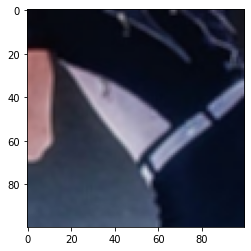

In [117]:
plt.imshow(filtered.astype('uint8'))